# Random Graph Models

*November 9 2022*

In this practice session, we implement the $G(n,m)$ and $G(n,p)$ random graph models that we introduced in the lecture.

In [1]:
import pathpy as pp
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default')
sns.set_style("whitegrid")

## The $G(n,m)$ model by Pál Erdös and Alfred Rényi

Let us write a `python` function that generates a random realisation of Erdös-Rényi networks according to the $G(n,m)$ model for a given number of nodes $n$ and a given number of randomly generated links $m$. Like in the lecture, we assume that we generate undirected networks with self-loops:

In [2]:
def Gnm(n, m):

    network: pp.Network = pp.Network(directed=False)
    edges_added: int = 0

    # Add nodes with zero-based numbers as UIDs
    for i in range(n):
        network.add_node(str(i))
    
    # Add m edges at random
    while edges_added < m:

        # Choose two nodes with replacement:
        v, w = np.random.choice(list(network.nodes.uids), size=2, replace=True)

        if (v,w) not in network.edges:
            network.add_edge(v,w)
            edges_added += 1
    return network

In [3]:
n = 20
m = 30

m_1 = Gnm(n, m)
print(m_1)
print('---')

m_2 = Gnm(n, m)
print(m_2)
print('---')

m_3 = Gnm(n, m)
print(m_3)
print('---')

Uid:			0x7f9c1c2de490
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	20
Number of edges:	30
---
Uid:			0x7f9c1c2ded00
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	20
Number of edges:	30
---
Uid:			0x7f9bd1be1f70
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	20
Number of edges:	30
---


In [4]:
m_1 = Gnm(100, 120)
m_1.plot()

In [5]:
m_2 = Gnm(100, 120)
m_2.plot()

In [6]:
m_3 = Gnm(100, 120)
m_3.plot()

# The $G(n,p)$ model by Edgar Nelson Gilbert

A downside of the $G(n,m)$ model is that links are not generated independently. We can address this with another model originally proposed by Edgar Nelson Gilbert. It assumes that we initially generate $n$ isolated nodes, connecting each pair of nodes with a fixed probability $p$ (i.e. through a Bernoulli trial).

The following `python` function implements this simple model:

In [7]:
def Gnp(n, p):

    network: pp.Network = pp.Network(directed=False)

    # add nodes with numeric uids
    for i in range(n):
        network.add_node(str(i))

    # iterate through all node indices (incl. self-loops)
    for s in range(n):
        for t in range(s+1):          
            # perform Bernoulli trial  
            if np.random.random() < p:
                network.add_edge(str(s), str(t))
    return network

If we generate a number of networks based on the same parameters we observe that the resulting microstates have different numbers of edges (different from the $G(n,m)$ model where the edge number is fixed):

In [8]:
n = 30
p = 0.2

m_1 = Gnp(n, p)
print(m_1)
print('---')

m_2 = Gnp(n, p)
print(m_2)
print('---')

m_3 = Gnp(n, p)
print(m_3)

Uid:			0x7f9bd1b9b550
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	30
Number of edges:	87
---
Uid:			0x7f9bd1b9b790
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	30
Number of edges:	90
---
Uid:			0x7f9bd027ed30
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	30
Number of edges:	89


In [9]:
m_1.plot()

In [10]:
m_2.plot()

In [11]:
m_3.plot()

We can check the distribution of the number of edges in microstates generated by the `G(n,p)` model with connection probability `p`. In the lecture we have seen that the expected number of edges is $\frac{1}{2} \cdot p \cdot n \dot (n+1)$. The following plot, in which we plot the distribution of edge counts as well as the theoretically expected number of edges for 200 random microstates generated by the $G(n,p)$ model, confirms this:

/home/user/PycharmProjects/SNA/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


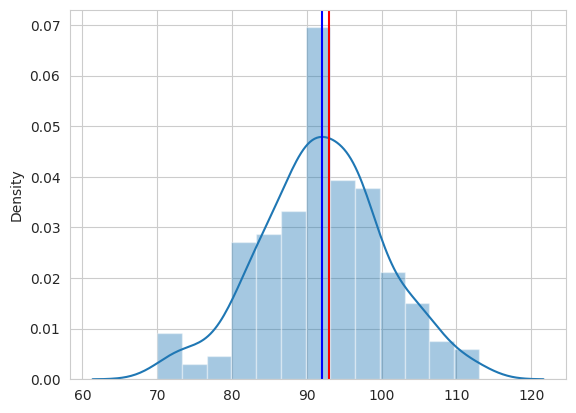

In [13]:
edge_counts = [ Gnp(n,p).number_of_edges() for i in range(200) ]
ax = sns.distplot(edge_counts)

expected = 0.5 * p * n * (n+1)
ax.axvline(expected, color='red')
ax.axvline(np.mean(edge_counts), color='blue')

# Random graph models in pathpy

The `pathpy` module `generators` implements a number of random graph models, among them $G(n,m)$ and $G(n,p)$ model. To generate $G(n,m)$ random graphs we can write:

In [14]:
n = pp.generators.ER_nm(30, 40, directed=False)
pp.plot(n)

We can define random graph models with directed or undirected networks with or without loops and with multiple edges. You can use the `max_edges` functions to check the maximum number of possible edges for such networks with a given number of nodes. It returns the quantities explained in the combinatorics primer in  lecture L04:

In [15]:
print(pp.generators.max_edges(100, directed=True, loops=True))
print(pp.generators.max_edges(100, directed=True, loops=False))
print(pp.generators.max_edges(100, directed=False, loops=True))
print(pp.generators.max_edges(100, directed=False, loops=False))

10000
9900
5050
4950


If we specify parameters of an impossible network, the random graph models issue the appropriate error message:

In [16]:
pp.generators.ER_nm(n=100, m=5060, directed=False, loops=True)

[11-16 18:46:23: ERROR] Given network type with n nodes can have at most 5050 edges.


The function `pp.generators.ER_np` generates microstates according to the $G(n,p)$ model:

In [17]:
n = pp.generators.ER_np(n=100, p=0.02)
n.plot()

We often use random graph models to randomize the topology of a given network, while maintaining aggregate characteristics like, e.g., the number of nodes or links or the degree sequence or distribution. For this common task, `pathpy` provides `_randomize` versions of certain random graph models that automatically adjust the model parameters to a given network instance. To see how this works, consider our standard toy example:

In [18]:
n_undirected = pp.Network(directed=False)
n_undirected.add_edge('a', 'b')
n_undirected.add_edge('b', 'c')
n_undirected.add_edge('c', 'a')
n_undirected.add_edge('d', 'e')
n_undirected.add_edge('e', 'f')
n_undirected.add_edge('f', 'g')
n_undirected.add_edge('g', 'd')
n_undirected.add_edge('d', 'f')
n_undirected.add_edge('b', 'd')
n_undirected.plot()

We can use the $G(n,m)$ model to generate a random version of this network with the same number of nodes, edges, the same edge directedness and the same node uids as follows:

In [19]:
n = pp.generators.ER_nm_randomize(n_undirected)
n.plot()

We can do the same for the $G(n,p)$ model. Here the parameter $p$ is automatically fitted to the given network, i.e. it is chosen such that the number of *expected links* in the generated microstates matches the number of links in the given network:

In [20]:
n = pp.generators.ER_np_randomize(n_undirected)
n.plot()

Let us check whether this works as expected (pun intended): In the following we generate 200 randomized versions of our toy example and plot the distribution of the edge counts across all microstates. We further plot the average number of edges across the microstates (blue vertical line) as well as the number of edges in the network that we randomized (red vertical line):

/home/user/PycharmProjects/SNA/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


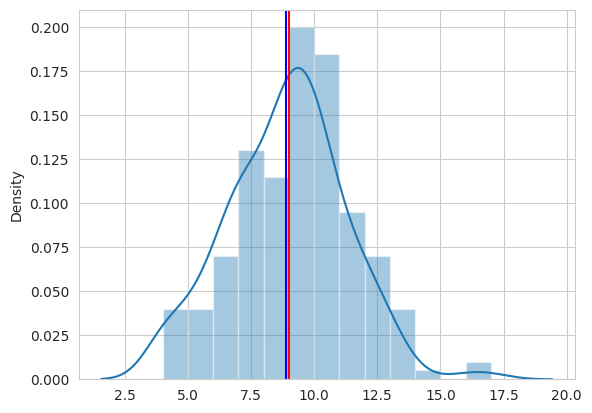

In [21]:
edge_counts = [pp.generators.ER_np_randomize(n_undirected).number_of_edges() for i in range(200) ]
# for i in range(200):
#     r = 
#     link_numbers.append(r.number_of_edges())
ax = sns.distplot(edge_counts)

ax.axvline(n_undirected.number_of_edges(), color='red')
ax.axvline(np.mean(edge_counts), color='blue')